# Garmin Run Data Analysis

## Import Libraries

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load the Data

In [2]:
activities = pd.read_csv('data/Activities.csv')
activities.head()

,Activity Type,Date,Favorite,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,...,Min Temp,Surface Interval,Decompression,Best Lap Time,Number of Laps,Max Temp,Moving Time,Elapsed Time,Min Elevation,Max Elevation
0,Running,2024-05-09 12:44:32,False,Tama Ward Running,1.63,82,00:09:12.3,128,149,152,...,0.0,0:00,No,00:03:28.8,2,0.0,00:09:08,00:11:45,19,40
1,Running,2024-05-08 21:03:33,False,Tama Ward Running,0.35,16,00:01:56.2,128,150,142,...,0.0,0:00,No,00:01:56.2,1,0.0,00:01:50,00:02:27.8,23,55
2,Running,2024-05-08 19:59:32,False,Tama Ward Running,5.51,344,00:32:08,150,171,154,...,0.0,0:00,No,00:03:01.3,6,0.0,00:32:03,00:33:33,16,40
3,Running,2024-05-07 18:39:11,False,Tama Ward Running,6.00,377,00:36:05,146,163,156,...,0.0,0:00,No,00:00:01.0,7,0.0,00:36:03,00:41:22,17,43
4,Running,2024-05-06 21:55:53,False,Tama Ward Running,1.68,99,00:10:17,135,150,149,...,0.0,0:00,No,00:04:06.6,2,0.0,00:10:11,00:10:39,20,41


## Examining the Data

In [3]:
activities.shape

(983, 38)

In [67]:
activities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Activity Type             983 non-null    object        
 1   Date                      983 non-null    datetime64[ns]
 2   Favorite                  983 non-null    bool          
 3   Title                     983 non-null    object        
 4   Distance                  983 non-null    float64       
 5   Calories                  983 non-null    object        
 6   Time                      983 non-null    object        
 7   Avg HR                    983 non-null    int64         
 8   Max HR                    983 non-null    int64         
 9   Avg Run Cadence           983 non-null    object        
 10  Max Run Cadence           983 non-null    object        
 11  Avg Pace                  983 non-null    object        
 12  Best Pace             

In [130]:
activities.describe(include='all', datetime_is_numeric=True)

,Activity Type,Date,Favorite,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,...,Decompression,Best Lap Time,Number of Laps,Max Temp,Moving Time,Elapsed Time,Min Elevation,Max Elevation,Month,Week
count,983,983,983,983,983.000000,983,983,983.000000,983.000000,983,...,983,983,983.000000,983.0,983,983,983,983,983,983
unique,5,NaN,1,95,NaN,540,906,NaN,NaN,78,...,1,671,NaN,NaN,857,929,88,111,46,NaN
top,Running,NaN,False,Tama Ward Running,NaN,15,00:25:50,NaN,NaN,156,...,No,00:00:01.4,NaN,NaN,00:00:00,00:37:01,4,40,2021-01,NaN
freq,940,NaN,983,272,NaN,11,3,NaN,NaN,73,...,983,20,NaN,NaN,30,3,109,65,44,NaN
mean,NaN,2022-04-18 01:58:08.198372352,NaN,NaN,5.585341,NaN,NaN,138.039674,159.587996,NaN,...,NaN,NaN,7.053917,0.0,NaN,NaN,NaN,NaN,NaN,2022-04-14 09:10:48.219735552
min,NaN,2020-08-08 23:53:39,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,NaN,...,NaN,NaN,1.000000,0.0,NaN,NaN,NaN,NaN,NaN,2020-08-03 00:00:00
25%,NaN,2021-05-10 08:49:02.500000,NaN,NaN,1.650000,NaN,NaN,131.000000,150.000000,NaN,...,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN,NaN,2021-05-06 12:00:00
50%,NaN,2022-03-20 09:29:47,NaN,NaN,5.010000,NaN,NaN,141.000000,163.000000,NaN,...,NaN,NaN,6.000000,0.0,NaN,NaN,NaN,NaN,NaN,2022-03-14 00:00:00
75%,NaN,2023-03-07 19:24:45,NaN,NaN,7.640000,NaN,NaN,149.000000,174.000000,NaN,...,NaN,NaN,9.000000,0.0,NaN,NaN,NaN,NaN,NaN,2023-03-06 00:00:00
max,NaN,2024-05-09 12:44:32,NaN,NaN,42.510000,NaN,NaN,177.000000,202.000000,NaN,...,NaN,NaN,46.000000,0.0,NaN,NaN,NaN,NaN,NaN,2024-05-06 00:00:00


In [102]:
activities.describe(include='object')

,Activity Type,Title,Calories,Time,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Total Ascent,Total Descent,Dive Time,Surface Interval,Decompression,Best Lap Time,Moving Time,Elapsed Time,Min Elevation,Max Elevation
count,983,983,983,983,983,983,983,983,983,983,983,983,983,983,983,983,983,983
unique,5,95,540,906,78,98,219,249,178,177,1,1,1,671,857,929,88,111
top,Running,Tama Ward Running,15,00:25:50,156,167,--,--,--,--,0:00,0:00,No,00:00:01.4,00:00:00,00:37:01,4,40
freq,940,272,11,3,73,48,24,24,126,129,983,983,983,20,30,3,109,65


In [74]:
activities.isna().sum()

Activity Type               0
Date                        0
Favorite                    0
Title                       0
Distance                    0
Calories                    0
Time                        0
Avg HR                      0
Max HR                      0
Avg Run Cadence             0
Max Run Cadence             0
Avg Pace                    0
Best Pace                   0
Total Ascent                0
Total Descent               0
Avg Stride Length           0
Avg Vertical Ratio          0
Avg Vertical Oscillation    0
Avg Ground Contact Time     0
Training Stress Score®      0
Avg Power                   0
Max Power                   0
Grit                        0
Flow                        0
Avg. Swolf                  0
Avg Stroke Rate             0
Total Reps                  0
Dive Time                   0
Min Temp                    0
Surface Interval            0
Decompression               0
Best Lap Time               0
Number of Laps              0
Max Temp  

## Data Manipulation

### Change dtype

In [227]:
activities = pd.read_csv('data/Activities.csv')
activities.head()

,Activity Type,Date,Favorite,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,...,Min Temp,Surface Interval,Decompression,Best Lap Time,Number of Laps,Max Temp,Moving Time,Elapsed Time,Min Elevation,Max Elevation
0,Running,2024-05-09 12:44:32,False,Tama Ward Running,1.63,82,00:09:12.3,128,149,152,...,0.0,0:00,No,00:03:28.8,2,0.0,00:09:08,00:11:45,19,40
1,Running,2024-05-08 21:03:33,False,Tama Ward Running,0.35,16,00:01:56.2,128,150,142,...,0.0,0:00,No,00:01:56.2,1,0.0,00:01:50,00:02:27.8,23,55
2,Running,2024-05-08 19:59:32,False,Tama Ward Running,5.51,344,00:32:08,150,171,154,...,0.0,0:00,No,00:03:01.3,6,0.0,00:32:03,00:33:33,16,40
3,Running,2024-05-07 18:39:11,False,Tama Ward Running,6.00,377,00:36:05,146,163,156,...,0.0,0:00,No,00:00:01.0,7,0.0,00:36:03,00:41:22,17,43
4,Running,2024-05-06 21:55:53,False,Tama Ward Running,1.68,99,00:10:17,135,150,149,...,0.0,0:00,No,00:04:06.6,2,0.0,00:10:11,00:10:39,20,41


In [224]:
activities['Time']

0      0000000000000000000000000000000000000000000000...
1      0000000000000000000000000000000000000000000000...
2      0000000000000000000000000000000000000000000000...
3      0000000000000000000000000000000000000000000000...
4      0000000000000000000000000000000000000000000000...
                             ...                        
978    0000000000000000000000000000000000000000000000...
979    0000000000000000000000000000000000000000000000...
980    0000000000000000000000000000000000000000000000...
981    0000000000000000000000000000000000000000000000...
982    0000000000000000000000000000000000000000000000...
Name: Time, Length: 983, dtype: object

In [228]:
for i in range(len(activities['Time'])):
    hr, min, sec = activities['Time'][i].split(':')
    activities['Time'] = float(hr)*3600 + float(min)*60 + float(sec)
    
activities['Time'][0]

AttributeError: 'numpy.float64' object has no attribute 'split'

In [219]:
# change Pace times to seconds (float)

def change_to_seconds(paces):
    for pace in paces:
        hr, min, sec = pace.split(':')
        return float(hr)*3600 + float(min)*60 + float(sec)
    
new_df['Time'] = new_df['Time'].apply(change_to_seconds)
#     activities['Time'][i] = hr*3600 + min*60 + sec

ValueError: not enough values to unpack (expected 3, got 1)

In [211]:
activities['Time']

0      552.3
1      552.3
2      552.3
3      552.3
4      552.3
       ...  
978    552.3
979    552.3
980    552.3
981    552.3
982    552.3
Name: Time, Length: 983, dtype: float64

In [183]:
60*60

3600

## Data Cleaning
- Our initial examination revealed that:
    - There seem to be no missing values
    - There are some columns with only 1 unique value
    - There are other columns irrelevant for this analysis

### Remove columns with only 1 unique value

In [162]:
# List of all columns
columns_to_check = list(activities.columns)

# List up columns with only 1 unique value
same_columns = [column for column in columns_to_check if activities[column].nunique() == 1]

# Make new dataframe with those columns dropped
new_df = activities.drop(columns=same_columns)

new_df.columns

Index(['Activity Type', 'Date', 'Title', 'Distance', 'Calories', 'Time',
       'Avg HR', 'Max HR', 'Avg Run Cadence', 'Max Run Cadence', 'Avg Pace',
       'Best Pace', 'Total Ascent', 'Total Descent', 'Avg Stride Length',
       'Best Lap Time', 'Number of Laps', 'Moving Time', 'Elapsed Time',
       'Min Elevation', 'Max Elevation', 'Month', 'Week'],
      dtype='object')

### Remove other irrelevant columns

In [163]:
irrelevant_columns = ['Number of Laps', 'Best Lap Time', 'Max Run Cadence', 'Best Pace']
new_df.drop(columns = irrelevant_columns, inplace=True)

In [164]:
new_df.columns

Index(['Activity Type', 'Date', 'Title', 'Distance', 'Calories', 'Time',
       'Avg HR', 'Max HR', 'Avg Run Cadence', 'Avg Pace', 'Total Ascent',
       'Total Descent', 'Avg Stride Length', 'Moving Time', 'Elapsed Time',
       'Min Elevation', 'Max Elevation', 'Month', 'Week'],
      dtype='object')

### Remove irrelevant rows

In [165]:
# Find irrelevant data
new_df['Activity Type'].unique()

array(['Running', 'Other', 'Treadmill Running', 'Walking',
       'Incident Detected'], dtype=object)

In [166]:
# Select only Running activities
new_df = new_df[new_df['Activity Type'] == 'Running']

In [167]:
new_df.head()

,Activity Type,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,Avg Pace,Total Ascent,Total Descent,Avg Stride Length,Moving Time,Elapsed Time,Min Elevation,Max Elevation,Month,Week
0,Running,2024-05-09 12:44:32,Tama Ward Running,1.63,82,00:09:12.3,128,149,152,5:40,24,26,1.16,00:09:08,00:11:45,19,40,2024-05,2024-05-06
1,Running,2024-05-08 21:03:33,Tama Ward Running,0.35,16,00:01:56.2,128,150,142,5:33,--,--,1.27,00:01:50,00:02:27.8,23,55,2024-05,2024-05-06
2,Running,2024-05-08 19:59:32,Tama Ward Running,5.51,344,00:32:08,150,171,154,5:50,51,56,1.11,00:32:03,00:33:33,16,40,2024-05,2024-05-06
3,Running,2024-05-07 18:39:11,Tama Ward Running,6.00,377,00:36:05,146,163,156,6:01,69,64,1.07,00:36:03,00:41:22,17,43,2024-05,2024-05-06
4,Running,2024-05-06 21:55:53,Tama Ward Running,1.68,99,00:10:17,135,150,149,6:08,23,23,1.09,00:10:11,00:10:39,20,41,2024-05,2024-05-06


## Feature Engineering

In [ ]:
# Day of the week

activities['DayOfWeek'] = activities['Date'].dt.day_name()

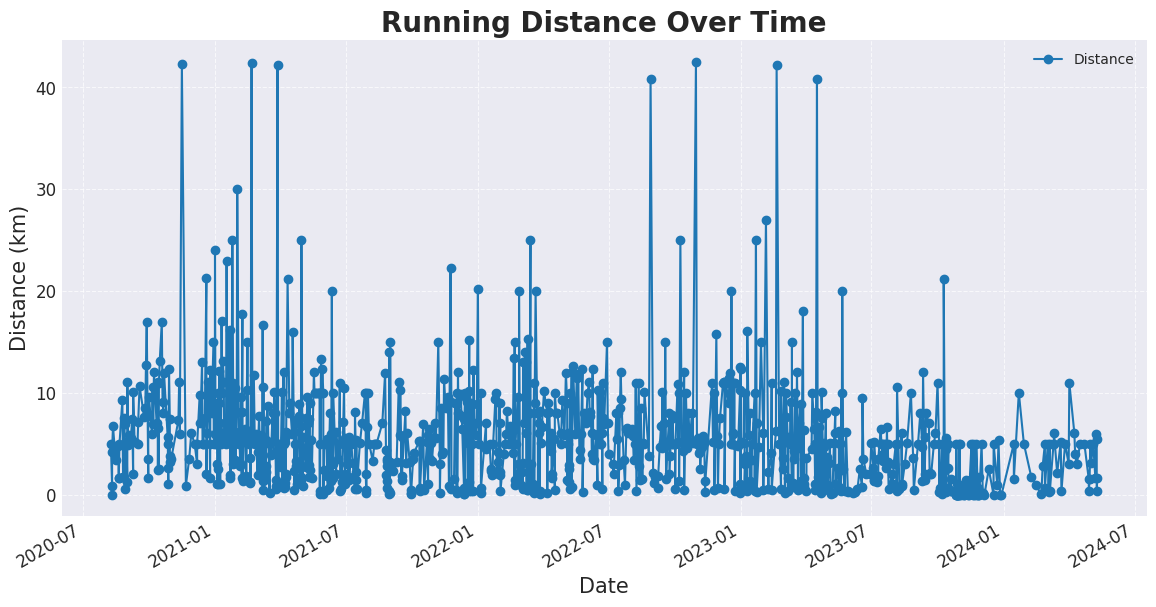

In [10]:


# Convert 'Date' column to datetime
activities['Date'] = pd.to_datetime(activities['Date'])

# Set a style
plt.style.use('seaborn-darkgrid')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(14, 7))

# Plot the data
activities.plot(x='Date', y='Distance', kind='line', marker='o', ax=ax)

# Customize the plot
ax.set_title('Running Distance Over Time', fontsize=20, fontweight='bold')
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Distance (km)', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [47]:
activities.columns

Index(['Activity Type', 'Date', 'Favorite', 'Title', 'Distance', 'Calories',
       'Time', 'Avg HR', 'Max HR', 'Avg Run Cadence', 'Max Run Cadence',
       'Avg Pace', 'Best Pace', 'Total Ascent', 'Total Descent',
       'Avg Stride Length', 'Avg Vertical Ratio', 'Avg Vertical Oscillation',
       'Avg Ground Contact Time', 'Training Stress Score®', 'Avg Power',
       'Max Power', 'Grit', 'Flow', 'Avg. Swolf', 'Avg Stroke Rate',
       'Total Reps', 'Dive Time', 'Min Temp', 'Surface Interval',
       'Decompression', 'Best Lap Time', 'Number of Laps', 'Max Temp',
       'Moving Time', 'Elapsed Time', 'Min Elevation', 'Max Elevation',
       'Month', 'Week'],
      dtype='object')

In [ ]:
activities['Avg Pace'].unique

In [55]:
activities['Activity Type'].unique()


array(['Running', 'Other', 'Treadmill Running', 'Walking',
       'Incident Detected'], dtype=object)

In [44]:
select_columns = ['Activity Type', 'Date', 'Title', 'Distance', 'Calories',
       'Time', 'Avg HR', 'Max HR', 'Avg Run Cadence', 'Max Run Cadence',
       'Avg Pace', 'Best Pace', 'Total Ascent', 'Total Descent',
       'Avg Stride Length', 'Moving Time', 'Elapsed Time', 'Min Elevation', 'Max Elevation']

new_df = activities[select_columns]
select_df = new_df.copy()
select_df.head(3)

,Activity Type,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Total Ascent,Total Descent,Avg Stride Length,Moving Time,Elapsed Time,Min Elevation,Max Elevation
0,Running,2024-05-09 12:44:32,Tama Ward Running,1.63,82,00:09:12.3,128,149,152,161,5:40,5:01,24,26,1.16,00:09:08,00:11:45,19,40
1,Running,2024-05-08 21:03:33,Tama Ward Running,0.35,16,00:01:56.2,128,150,142,167,5:33,5:09,--,--,1.27,00:01:50,00:02:27.8,23,55
2,Running,2024-05-08 19:59:32,Tama Ward Running,5.51,344,00:32:08,150,171,154,163,5:50,4:29,51,56,1.11,00:32:03,00:33:33,16,40


In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data loading
# activities = pd.read_csv('your_file.csv')

select_columns = ['Activity Type', 'Date', 'Title', 'Distance', 'Calories',
                  'Time', 'Avg HR', 'Max HR', 'Avg Run Cadence', 'Max Run Cadence',
                  'Avg Pace', 'Best Pace', 'Total Ascent', 'Total Descent',
                  'Avg Stride Length', 'Moving Time', 'Elapsed Time', 'Min Elevation', 'Max Elevation']

# Create a new DataFrame with selected columns
new_df = activities[select_columns]

# Define a function to convert pace to total seconds
def pace_to_seconds(pace):
    if isinstance(pace, str):
        minutes, seconds = map(int, pace.split(':'))
        return minutes * 60 + seconds
    return pace

# Apply the function to convert 'Avg Pace' and 'Best Pace' to seconds
new_df['Avg Pace'] = new_df['Avg Pace'].apply(pace_to_seconds)
new_df['Best Pace'] = new_df['Best Pace'].apply(pace_to_seconds)

# Convert applicable columns to numeric, errors='coerce' will replace non-convertible values with NaN
columns_to_convert = ['Calories', 'Time', 'Avg Run Cadence', 'Max Run Cadence', 
                      'Avg Pace', 'Best Pace', 'Total Ascent', 'Total Descent', 
                      'Moving Time', 'Elapsed Time', 'Min Elevation', 'Max Elevation']

for col in columns_to_convert:
    new_df[col] = pd.to_numeric(new_df[col], errors='coerce')

# Drop non-numeric columns
numeric_df = new_df.select_dtypes(include=[pd.np.number])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='black')

# Customize the heatmap
plt.title('Correlation Heatmap', fontsize=20, fontweight='bold')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


ValueError: invalid literal for int() with base 10: '--'

In [26]:
new_df['Calories'] = pd.to_numeric(new_df['Calories'], errors='coerce')
new_df['Time'] = pd.to_numeric(new_df['Time'], errors='coerce')
new_df['Avg Run Cadence'] = pd.to_numeric(new_df['Avg Run Cadence'], errors='coerce')
new_df['Max Run Cadence'] = pd.to_numeric(new_df['Max Run Cadence'], errors='coerce')
new_df['Avg Pace'] = pd.to_numeric(new_df['Avg Pace'], errors='coerce')
new_df['Best Pace'] = pd.to_numeric(new_df['Best Pace'], errors='coerce')
new_df['Total Ascent'] = pd.to_numeric(new_df['Total Ascent'], errors='coerce')
new_df['Total Descent'] = pd.to_numeric(new_df['Total Descent'], errors='coerce')
new_df['Moving Time'] = pd.to_numeric(new_df['Moving Time'], errors='coerce')
new_df['Elapsed Time'] = pd.to_numeric(new_df['Elapsed Time'], errors='coerce')
new_df['Min Elevation'] = pd.to_numeric(new_df['Min Elevation'], errors='coerce')
new_df['Max Elevation'] = pd.to_numeric(new_df['Max Elevation'], errors='coerce')

new_df

/tmp/ipykernel_47683/2849500517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Calories'] = pd.to_numeric(new_df['Calories'], errors='coerce')
/tmp/ipykernel_47683/2849500517.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Time'] = pd.to_numeric(new_df['Time'], errors='coerce')
/tmp/ipykernel_47683/2849500517.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

,Activity Type,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Total Ascent,Total Descent,Avg Stride Length,Moving Time,Elapsed Time,Min Elevation,Max Elevation
0,Running,2024-05-09 12:44:32,Tama Ward Running,1.63,82.0,NaN,128,149,152.0,161.0,NaN,NaN,24.0,26.0,1.16,NaN,NaN,19.0,40.0
1,Running,2024-05-08 21:03:33,Tama Ward Running,0.35,16.0,NaN,128,150,142.0,167.0,NaN,NaN,NaN,NaN,1.27,NaN,NaN,23.0,55.0
2,Running,2024-05-08 19:59:32,Tama Ward Running,5.51,344.0,NaN,150,171,154.0,163.0,NaN,NaN,51.0,56.0,1.11,NaN,NaN,16.0,40.0
3,Running,2024-05-07 18:39:11,Tama Ward Running,6.00,377.0,NaN,146,163,156.0,173.0,NaN,NaN,69.0,64.0,1.07,NaN,NaN,17.0,43.0
4,Running,2024-05-06 21:55:53,Tama Ward Running,1.68,99.0,NaN,135,150,149.0,158.0,NaN,NaN,23.0,23.0,1.09,NaN,NaN,20.0,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,Running,2020-08-11 22:19:18,Kochi Shi - Steady State Run,6.70,433.0,NaN,154,179,159.0,188.0,NaN,NaN,16.0,17.0,1.20,NaN,NaN,4.0,15.0
979,Running,2020-08-10 16:51:04,Shimanto Shi Running,4.24,280.0,NaN,155,167,155.0,208.0,NaN,NaN,23.0,21.0,1.23,NaN,NaN,2.0,14.0
980,Incident Detected,2020-08-10 16:44:51,Shimanto Shi Incident Detected,0.01,1.0,NaN,143,145,NaN,NaN,2.3,4.1,NaN,NaN,0.00,NaN,NaN,6.0,7.0
981,Running,2020-08-10 16:39:55,Shimanto Shi - Easy Run,0.90,55.0,NaN,137,151,155.0,169.0,NaN,NaN,NaN,1.0,1.18,NaN,NaN,6.0,9.0


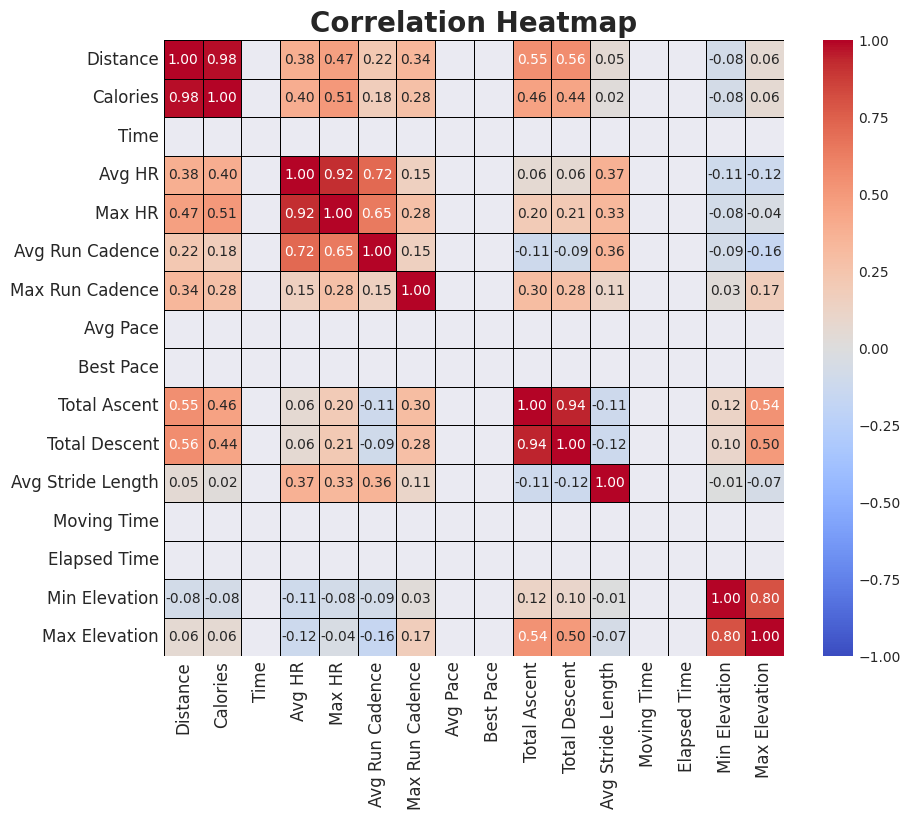

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data loading
# activities = pd.read_csv('your_file.csv')

# Compute the correlation matrix
correlation_matrix = new_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='black')

# Customize the heatmap
plt.title('Correlation Heatmap', fontsize=20, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


In [24]:
new_df.dtypes

Activity Type                object
Date                 datetime64[ns]
Title                        object
Distance                    float64
Calories                     object
Time                         object
Avg HR                        int64
Max HR                        int64
Avg Run Cadence              object
Max Run Cadence              object
Avg Pace                     object
Best Pace                    object
Total Ascent                 object
Total Descent                object
Avg Stride Length           float64
Moving Time                  object
Elapsed Time                 object
Min Elevation                object
Max Elevation                object
dtype: object

In [40]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Convert 'Date' column to datetime
# activities['Date'] = pd.to_datetime(activities['Date'])

# # Create a new column for the month and year
# activities['Month'] = activities['Date'].dt.to_period('M')

# # Group by the new 'Month' column and sum the 'Distance' for each month
# monthly_totals = activities.groupby('Month')['Distance'].sum().reset_index()

# # Convert 'Month' back to a datetime type for plotting
# monthly_totals['Month'] = monthly_totals['Month'].dt.to_timestamp()

# # Set a style
# plt.style.use('seaborn-darkgrid')

# # Create a figure and axis
# fig, ax = plt.subplots(figsize=(14, 7))

# # Plot the data
# ax.plot(monthly_totals['Month'], monthly_totals['Distance'], marker='o')

# # Customize the plot
# ax.set_title('Monthly Running Distance Totals', fontsize=20, fontweight='bold')
# ax.set_xlabel('Month', fontsize=15)
# ax.set_ylabel('Distance (km)', fontsize=15)
# ax.tick_params(axis='both', which='major', labelsize=12)
# ax.grid(True, linestyle='--', alpha=0.7)

# # Show the plot
# plt.show()


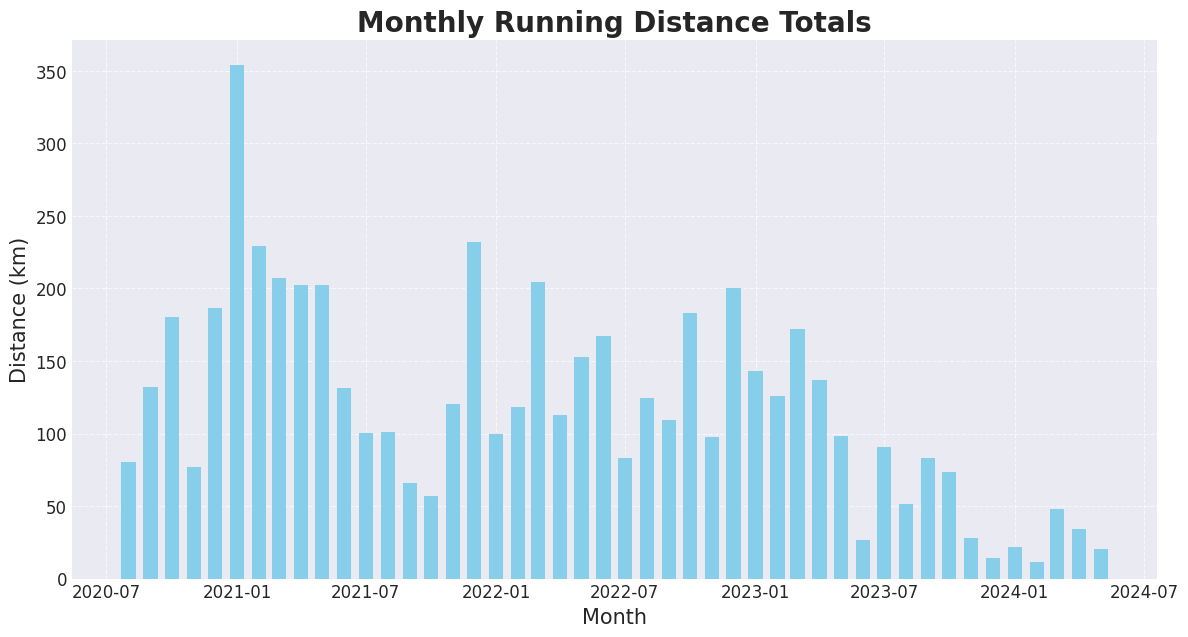

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime
activities['Date'] = pd.to_datetime(activities['Date'])

# Create a new column for the month and year
activities['Month'] = activities['Date'].dt.to_period('M')

# Group by the new 'Month' column and sum the 'Distance' for each month
monthly_totals = activities.groupby('Month')['Distance'].sum().reset_index()

# Convert 'Month' back to a datetime type for plotting
monthly_totals['Month'] = monthly_totals['Month'].dt.to_timestamp()

# Set a style
plt.style.use('seaborn-darkgrid')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(14, 7))

# Plot the data as a bar graph with thicker bars
bar_width = 20  # Adjust this value to make the bars thicker
ax.bar(monthly_totals['Month'], monthly_totals['Distance'], width=bar_width, color='skyblue', align='center')

# Customize the plot
ax.set_title('Monthly Running Distance Totals', fontsize=20, fontweight='bold')
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Distance (km)', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()


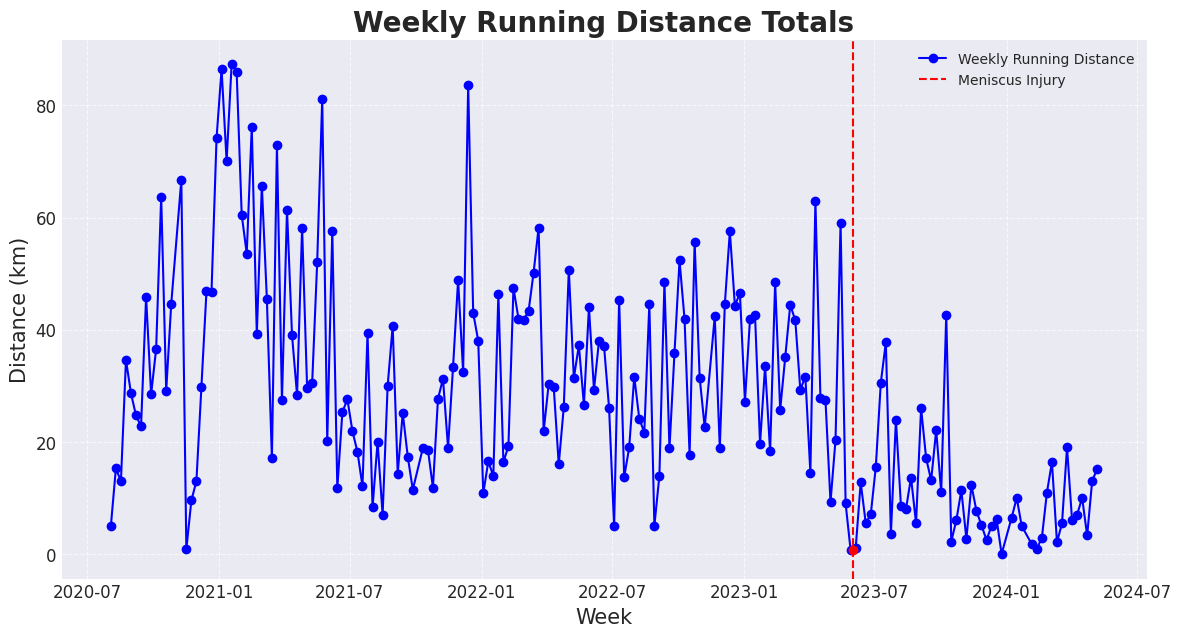

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime
activities['Date'] = pd.to_datetime(activities['Date'])

# Create a new column for the week
activities['Week'] = activities['Date'].dt.to_period('W').apply(lambda r: r.start_time)

# Group by the new 'Week' column and sum the 'Distance' for each week
weekly_totals = activities.groupby('Week')['Distance'].sum().reset_index()

# Set a style
plt.style.use('seaborn-darkgrid')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(14, 7))

# Plot the data as a line graph
ax.plot(weekly_totals['Week'], weekly_totals['Distance'], marker='o', linestyle='-', color='b', label='Weekly Running Distance')

# Add a marker for the meniscus injury on 6/1/2023
injury_date = pd.Timestamp('2023-06-01')
injury_week = injury_date.to_period('W').start_time
injury_distance = weekly_totals[weekly_totals['Week'] == injury_week]['Distance'].values[0]
ax.axvline(injury_date, color='r', linestyle='--', label='Meniscus Injury')
ax.scatter(injury_date, injury_distance, color='r', zorder=5)

# Customize the plot
ax.set_title('Weekly Running Distance Totals', fontsize=20, fontweight='bold')
ax.set_xlabel('Week', fontsize=15)
ax.set_ylabel('Distance (km)', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.7)

# Add a legend
ax.legend()

# Show the plot
plt.show()


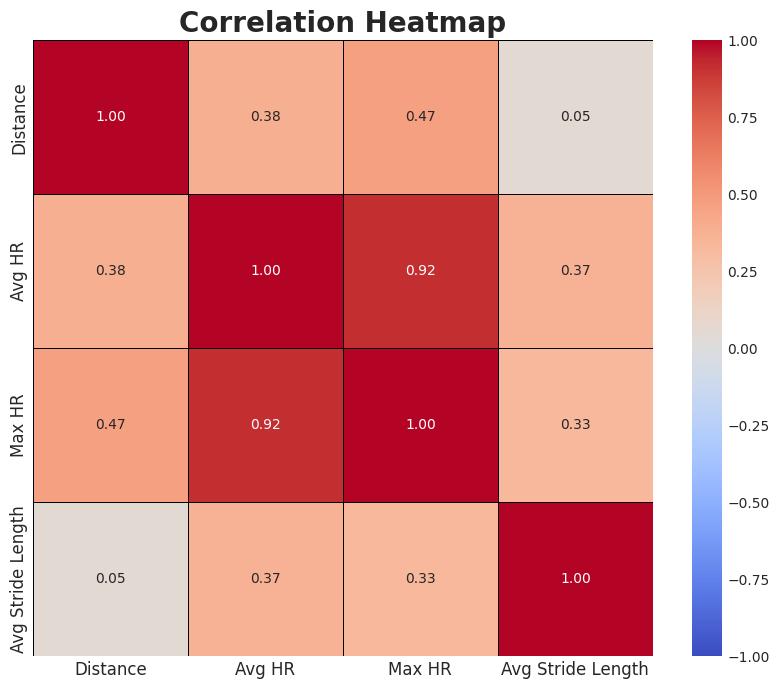